In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#import
df = pd.read_csv('2020.csv')

#drop columns
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)

#formatting
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#rename
df.rename({
'TD': 'PassingTD',
'TD.1': 'RushingTD',
'TD.2': 'ReceivingTD',
'TD.3': 'TotalTD',
'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs',
'Att': 'PassingAtt',
'Att.1': 'RushingAtt'
}, axis=1, inplace=True)

#seperate off pos
rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

rb_df

,Player,Tm,FantPos,Age,G,Cmp,PassingAtt,PassingYDs,PassingTD,Int,...,RushingYDs,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,TotalTD
0,Derrick Henry,TEN,RB,26,16,0,0,0,0,0,...,2027,5.36,17,31,19,114,6.00,0,2,17
1,Alvin Kamara,NOR,RB,25,15,0,0,0,0,0,...,932,4.98,16,107,83,756,9.11,5,0,21
2,Dalvin Cook,MIN,RB,25,14,0,0,0,0,0,...,1557,4.99,16,54,44,361,8.20,1,3,17
11,Jonathan Taylor,IND,RB,21,15,0,0,0,0,0,...,1169,5.04,11,39,36,299,8.31,1,1,12
12,Aaron Jones,GNB,RB,26,14,0,0,0,0,0,...,1104,5.49,9,63,47,355,7.55,2,0,11
14,David Montgomery,CHI,RB,23,15,0,0,0,0,0,...,1070,4.33,8,68,54,438,8.11,2,1,10
17,James Robinson,JAX,RB,22,14,0,0,0,0,0,...,1070,4.46,7,60,49,344,7.02,3,1,10
18,Josh Jacobs,LVR,RB,22,15,0,0,0,0,0,...,1065,3.90,12,45,33,238,7.21,0,2,12
21,Nick Chubb,CLE,RB,25,12,0,0,0,0,0,...,1067,5.62,12,18,16,150,9.38,0,1,12
30,Kareem Hunt,CLE,RB,25,16,0,0,0,0,0,...,841,4.25,6,51,38,304,8.00,5,0,11


In [4]:
rushing_columns = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD']
receiving_columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']
passing_columns = ['PassingAtt', 'PassingYDs', 'PassingTD', 'Int']

def transform_columns(df, new_column_list):
        df = df[['Player', 'Tm', 'Age', 'G'] + new_column_list + ['FL']]
        return df

In [5]:
rb_df = transform_columns(rb_df, rushing_columns+receiving_columns)
wr_df = transform_columns(wr_df, rushing_columns+receiving_columns)
te_df = transform_columns(te_df, receiving_columns)
qb_df = transform_columns(qb_df, passing_columns+rushing_columns)


C:\Users\rodth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rodth\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\rodth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

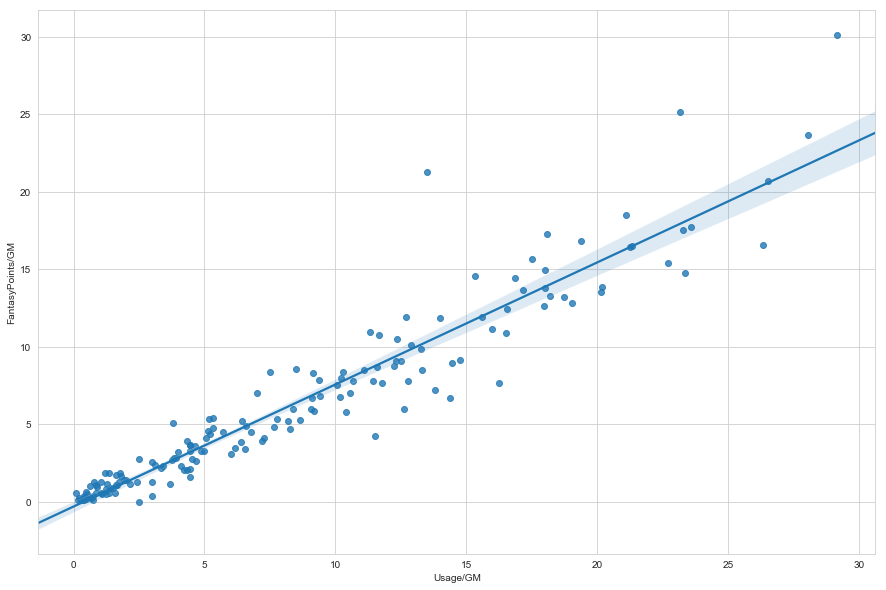

In [6]:
#usg vs fppg

rb_df['FantasyPoints'] = rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6 + rb_df['Rec'] + rb_df['ReceivingYDs']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FL']*2


#new column for Fantasy points per game.
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['G']
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))

#new column for usage per game. Usage is defined as # of targets + carries
rb_df['Usage/GM'] = (rb_df['RushingAtt'] + rb_df['Tgt']*1.5)/rb_df['G']

#round each row value to two decimal places
rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x, 2))

#just for styling. We imported seaborn earlier as sns.
sns.set_style('whitegrid')

#create a canvas with matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

#basic regression scatter plot with trendline
plot = sns.regplot(
x=rb_df['Usage/GM'],
y=rb_df['FantasyPoints/GM'],
scatter=True,)

C:\Users\rodth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


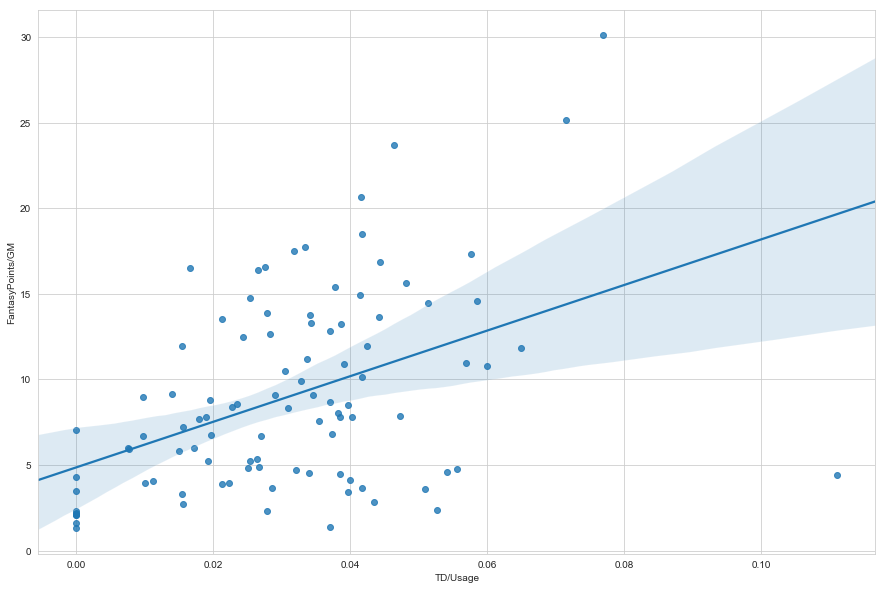

In [7]:

#How does efficiency correlate to fantasy football performance?
rb_df['TD/Usage'] = (rb_df['RushingTD']+ rb_df['ReceivingTD'])/(rb_df['RushingAtt'] + rb_df['Tgt'])

#Make sure there is an adequete sample size

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

rb_df = rb_df[rb_df['RushingAtt'] > 20]

plot = sns.regplot(
    x=rb_df['TD/Usage'],
    y=rb_df['FantasyPoints/GM'],
    scatter=True)